# Compare ranking performance of JRS - Random ranking data
- JRS: white-box, black-box, factorization machines, explanable ensemble models
- Potential data: Ranking random
- Step:
    - Load recommendation results by all recsys
    - Compute predictive statistic on Y_pred (Class 0 and Class 1)
    and corresponding Y_prob (How confidence the ranking of recommended jobs are calculated on different JRS).

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Run this for reproduce
# Gets the current working directory
import os
cwd = os.getcwd()
print("Working directory:", cwd)
# Go up one directory from working directory
os.chdir("..")

Working directory: /Users/anhtth/Library/CloudStorage/OneDrive-UniversityofTwente/2023 UT- THESIS/1-Code/0.cb12_main/nb_analysis


# 1. White-box

## Logreg

In [4]:
model = 'logreg'
logreg_recommendations = pd.read_csv('./output_topN_tabular/rec_result_logreg_random_ranking.csv')

In [5]:
logreg_recommendations.head()

,UserID,JobID,Y_prob,Y_pred,rank
0,13,821691,0.946082,1,0
1,13,129969,0.538867,1,1
2,13,860580,0.537347,1,2
3,13,145443,0.530015,1,3
4,13,1092282,0.522887,1,4


In [6]:
logreg_recommendations[['Y_prob', 'Y_pred']].describe()

,Y_prob,Y_pred
count,74320.000000,74320.000000
mean,0.461944,0.130180
std,0.113750,0.336504
min,0.317202,0.000000
25%,0.405456,0.000000
50%,0.443049,0.000000
75%,0.478471,0.000000
max,0.996250,1.000000


In [7]:
logreg_agg = logreg_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()

In [8]:
logreg_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0  64645.0  0.431839  0.038841  0.317202  0.400767  0.432728  0.464705   
1      1   9675.0  0.663096  0.206878  0.500000  0.509066  0.525257  0.934802   

             
        max  
0  0.499998  
1  0.996250

In [9]:
logreg_agg['model']=model

In [10]:
logreg_agg.to_csv('./nb_analysis/logreg_random_agg_result.csv', header=True, index=False)

## Decision Tree

In [11]:
model = 'dt'
dt_recommendations = pd.read_csv('./output_topN_tabular/rec_result_dt_random_ranking.csv')

In [12]:
dt_agg = dt_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()

In [13]:
dt_agg

Y_pred   Y_prob                                   
            count mean  std  min  25%  50%  75%  max
0      0     68.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1      1  74252.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [14]:
dt_agg['model']=model
# reg_agg = pd.concat([logreg_agg, dt_agg], axis=0)

In [15]:
dt_agg.to_csv('./nb_analysis/dt_random_agg_result.csv', header=True, index=False)

## Naive Bayes

In [16]:
model = 'nb'
nb_recommendations = pd.read_csv('./output_topN_tabular/rec_result_nb_random_ranking.csv')

In [17]:
nb_agg = nb_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
nb_agg

Y_pred   Y_prob                                                          \
            count          mean           std           min           25%   
0      0  71102.0  6.741536e-23  1.913247e-22  8.667996e-24  2.205392e-23   
1      1   3218.0  9.997225e-01  5.070964e-04  9.899945e-01  9.996487e-01   

                                             
            50%           75%           max  
0  3.303513e-23  5.730314e-23  2.370744e-20  
1  9.998940e-01  1.000000e+00  1.000000e+00

In [18]:
nb_agg['model']=model

In [19]:
nb_agg.to_csv('./nb_analysis/nb_random_agg_result.csv', header=True, index=False)

# 2. Blackbox

### XGBoost

In [20]:
model = 'xgbt'
xgbt_recommendations = pd.read_csv('./output_topN_tabular/rec_result_xgbt_random_ranking.csv')

In [21]:
xgbt_agg = xgbt_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
xgbt_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0  71105.0  0.456265  0.002445  0.454236  0.454236  0.454236  0.459212   
1      1   3215.0  0.585659  0.004565  0.582661  0.582661  0.582661  0.592608   

             
        max  
0  0.459212  
1  0.592608

In [22]:
xgbt_agg['model']=model

In [23]:
xgbt_agg.to_csv('./nb_analysis/xgbt_random_agg_result.csv', header=True, index=False)

### AdaBoost

In [24]:
model = 'ada'
ada_recommendations = pd.read_csv('./output_topN_tabular/rec_result_ada_random_ranking.csv')

In [25]:
ada_agg = ada_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
ada_agg

Y_pred   Y_prob                                                             \
            count     mean       std       min       25%       50%       75%   
0      0  49187.0  0.49949  0.000296  0.498216  0.499263  0.499486  0.499744   
1      1  25133.0  0.50140  0.002817  0.500000  0.500147  0.500344  0.500715   

             
        max  
0  0.500000  
1  0.515353

In [26]:
ada_agg['model']=model

In [27]:
ada_agg.to_csv('./nb_analysis/ada_random_agg_result.csv', header=True, index=False)

### LDA

In [28]:
model = 'lda'
lda_recommendations = pd.read_csv('./output_topN_tabular/rec_result_lda_random_ranking.csv')

In [29]:
lda_agg = lda_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
lda_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0  71086.0  0.242935  0.033431  0.159560  0.216344  0.241475  0.267643   
1      1   3234.0  0.995530  0.019616  0.733022  0.996267  0.997007  0.997974   

             
        max  
0  0.403010  
1  0.999595

In [30]:
lda_agg['model']=model

In [31]:
lda_agg.to_csv('./nb_analysis/lda_random_agg_result.csv', header=True, index=False)

### QDA

In [32]:
model = 'qda'
qda_recommendations = pd.read_csv('./output_topN_tabular/rec_result_qda_random_ranking.csv')

In [33]:
qda_agg = qda_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
qda_agg

Y_pred   Y_prob                                                          \
            count          mean           std           min           25%   
0      0  71102.0  5.158508e-20  5.730175e-18  1.194175e-22  6.561251e-22   
1      1   3218.0  9.997831e-01  1.288041e-03  9.429953e-01  9.998094e-01   

                                             
            50%           75%           max  
0  1.336232e-21  6.174538e-21  1.239970e-15  
1  9.999451e-01  1.000000e+00  1.000000e+00

In [34]:
qda_agg['model']=model

In [35]:
qda_agg.to_csv('./nb_analysis/qda_random_agg_result.csv', header=True, index=False)

# 3. Factorization Machines model

### fm

In [36]:
model = 'fm'
fm_recommendations = pd.read_csv('./output_topN_myfm/rec20_fm_random.csv')

In [37]:
fm_agg = fm_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
fm_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0  23257.0  0.467586  0.009911  0.462288  0.462288  0.462288  0.468110   
1      1  51063.0  0.607031  0.046911  0.500008  0.576892  0.592392  0.635735   

             
        max  
0  0.499995  
1  0.847741

In [38]:
fm_agg['model']=model

In [39]:
fm_agg.to_csv('./nb_analysis/fm_random_agg_result.csv', header=True, index=False)

### fm_match

In [40]:
model = 'fm_match'
fm_match_recommendations = pd.read_csv('./output_topN_myfm/rec20_fm_match_random.csv')

In [41]:
fm_match_agg = fm_match_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
fm_match_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0  60432.0  0.357135  0.022024  0.324528  0.343880  0.353089  0.364340   
1      1  13888.0  0.685706  0.158348  0.500175  0.574225  0.612564  0.777577   

             
        max  
0  0.499787  
1  0.998796

In [42]:
fm_match_agg['model']=model

In [43]:
fm_match_agg.to_csv('./nb_analysis/fm_match_random_agg_result.csv', header=True, index=False)

### fm_side_info

In [44]:
model = 'fm_side_info'
fm_side_info_recommendations = pd.read_csv('./output_topN_myfm/rec20_fm_side_info_random.csv')

In [45]:
fm_side_info_agg = fm_side_info_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
fm_side_info_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0    367.0  0.486576  0.012771  0.408745  0.480042  0.490347  0.495826   
1      1  73453.0  0.668845  0.090963  0.500062  0.600152  0.654678  0.728016   

             
        max  
0  0.499912  
1  0.997551

In [46]:
fm_side_info_agg['model']=model

In [47]:
fm_side_info_agg.to_csv('./nb_analysis/fm_side_info_random_agg_result.csv', header=True, index=False)

### fm_extended

In [48]:
model = 'fm_extended'
fm_extended_recommendations = pd.read_csv('./output_topN_myfm/rec20_fm_extended_random.csv')

In [49]:
fm_extended_agg = fm_extended_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
fm_extended_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0  54397.0  0.353418  0.082390  0.163009  0.285824  0.334929  0.431975   
1      1  19423.0  0.634159  0.155973  0.500008  0.526110  0.568182  0.656527   

             
        max  
0  0.499999  
1  0.998449

In [50]:
fm_extended_agg['model']=model

In [51]:
fm_extended_agg.to_csv('./nb_analysis/fm_extended_random_agg_result.csv', header=True, index=False)

## 4. Ensembled explainabled models (EBM)

### ebm_location

In [52]:
model = 'ebm_location'
ebm_location_recommendations = pd.read_csv('./output_topN_ebm/rec_result_location_random.csv')

In [53]:
ebm_location_agg = ebm_location_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
ebm_location_agg

Y_pred   Y_prob                                                        \
            count      mean           std       min       25%       50%   
0      0  71102.0  0.317880  3.942430e-13  0.317880  0.317880  0.317880   
1      1   3218.0  0.921829  4.361679e-02  0.824957  0.893328  0.893328   

                       
        75%       max  
0  0.317880  0.317880  
1  0.988192  0.988192

In [54]:
ebm_location_agg['model']=model

In [55]:
ebm_location_agg.to_csv('./nb_analysis/ebm_location_random_agg_result.csv', header=True, index=False)

### ebm_side_info

In [56]:
model = 'ebm_side_info'
ebm_side_info_recommendations = pd.read_csv('./output_topN_ebm/rec_result_side_info_random.csv')

In [57]:
ebm_side_info_agg = ebm_side_info_recommendations. \
                        groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
ebm_side_info_agg

Y_pred   Y_prob                                                             \
            count      mean      std       min       25%       50%       75%   
0      1  74320.0  0.613706  0.02661  0.537199  0.596103  0.610817  0.629529   

             
        max  
0  0.818591

In [58]:
ebm_side_info_agg['model']=model

In [59]:
ebm_side_info_agg.to_csv('./nb_analysis/ebm_side_info_random_agg_result.csv', header=True, index=False)

### ebm_extended

In [60]:
model = 'ebm_extended'
ebm_extended_recommendations = pd.read_csv('./output_topN_ebm/rec_result_ebm_extended_random.csv')

In [61]:
ebm_extended_agg = ebm_extended_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
ebm_extended_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0  70381.0  0.408460  0.032579  0.313891  0.382648  0.402153  0.433714   
1      1   3939.0  0.860167  0.168646  0.500167  0.886569  0.922719  0.953163   

             
        max  
0  0.499767  
1  0.996182

In [62]:
ebm_extended_agg['model']=model

In [63]:
ebm_extended_agg.to_csv('./nb_analysis/ebm_extended_random_agg_result.csv', header=True, index=False)

## 5. Model DPEBM

### dpebm_location

In [64]:
model = 'dpebm_location'
dpebm_location_recommendations = pd.read_csv('./output_topN_ebm/rec_result_dpebm_location_random.csv')

In [65]:
dpebm_location_agg = dpebm_location_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
dpebm_location_agg

Y_pred   Y_prob                                                        \
            count      mean           std       min       25%       50%   
0      0  71102.0  0.292478  1.648138e-13  0.292478  0.292478  0.292478   
1      1   3218.0  0.742710  7.149685e-02  0.507987  0.696189  0.696189   

                       
        75%       max  
0  0.292478  0.292478  
1  0.851264  0.851264

In [66]:
dpebm_location_agg['model']=model

In [67]:
dpebm_location_agg.to_csv('./nb_analysis/dpebm_location_random_agg_result.csv', header=True, index=False)

### dpebm_side_info

In [68]:
model = 'dpebm_side_info'
dpebm_side_info_recommendations = pd.read_csv('./output_topN_ebm/rec_result_dpebm_side_info_random.csv')

In [69]:
dpebm_side_info_agg = dpebm_side_info_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
dpebm_side_info_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0  74320.0  0.495692  0.000093  0.495611  0.495624  0.495682  0.495682   

             
        max  
0  0.495901

In [70]:
dpebm_side_info_agg['model']=model

In [71]:
dpebm_side_info_agg.to_csv('./nb_analysis/dpebm_side_info_random_agg_result.csv', header=True, index=False)

### dpebm_extended

In [72]:
model = 'dpebm_extended'
dpebm_extended_recommendations = pd.read_csv('./output_topN_ebm/rec_result_dpebm_extended_random.csv')

In [73]:
dpebm_extended_agg = dpebm_extended_recommendations.groupby('Y_pred')[['Y_prob']]\
                        .describe() \
                        .reset_index()
dpebm_extended_agg

Y_pred   Y_prob                                                              \
            count      mean       std       min       25%       50%       75%   
0      0  71102.0  0.288924  0.000576  0.288365  0.288461  0.288996  0.289204   
1      1   3218.0  0.737610  0.072281  0.502092  0.690063  0.690835  0.847111   

             
        max  
0  0.290190  
1  0.848197

In [74]:
dpebm_extended_agg['model']=model

In [75]:
dpebm_extended_agg.to_csv('./nb_analysis/dpebm_extended_random_agg_result.csv', header=True, index=False)

# Summary Result

In [96]:
reg_agg = pd.concat([logreg_agg, dt_agg, nb_agg,
                    xgbt_agg, ada_agg, lda_agg, qda_agg,
                    fm_agg, fm_match_agg, fm_side_info_agg, fm_extended_agg,
                    ebm_location_agg, ebm_side_info_agg, ebm_extended_agg,
                    dpebm_location_agg, dpebm_side_info_agg, dpebm_extended_agg], axis=0)

In [97]:
reg_agg

Y_pred   Y_prob                                                          \
            count          mean           std           min           25%   
0      0  64645.0  4.318393e-01  3.884106e-02  3.172015e-01  4.007673e-01   
1      1   9675.0  6.630960e-01  2.068775e-01  5.000002e-01  5.090660e-01   
0      0     68.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1      1  74252.0  1.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00   
0      0  71102.0  6.741536e-23  1.913247e-22  8.667996e-24  2.205392e-23   
1      1   3218.0  9.997225e-01  5.070964e-04  9.899945e-01  9.996487e-01   
0      0  71105.0  4.562648e-01  2.445225e-03  4.542361e-01  4.542361e-01   
1      1   3215.0  5.856592e-01  4.564705e-03  5.826615e-01  5.826615e-01   
0      0  49187.0  4.994899e-01  2.959190e-04  4.982161e-01  4.992630e-01   
1      1  25133.0  5.014003e-01  2.816654e-03  5.000000e-01  5.001468e-01   
0      0  71086.0  2.429352e-01  3.343069e-02  1.595603e-01  2.163439e-01   
1      1   3234.0  9.955300e-01  1.961578e-02  7.330220e-01  9.962673e-01   
0      0  71102.0  5.158508e-20  5.730175e-18  1.194175e-22  6.561251e-22   
1      1   3218.0  9.997831e-01  1.288041e-03  9.429953e-01  9.998094e-01   
0      0  23257.0  4.675865e-01  9.910702e-03  4.622877e-01  4.622877e-01   
1      1  51063.0  6.070307e-01  4.691061e-02  5.000084e-01  5.768922e-01   
0      0  60432.0  3.571353e-01  2.202403e-02  3.245280e-01  3.438802e-01   
1      1  13888.0  6.857062e-01  1.583484e-01  5.001746e-01  5.742247e-01   
0      0    367.0  4.865757e-01  1.277065e-02  4.087448e-01  4.800424e-01   
1      1  73453.0  6.688448e-01  9.096322e-02  5.000621e-01  6.001520e-01   
0      0  54397.0  3.534183e-01  8.239025e-02  1.630092e-01  2.858241e-01   
1      1  19423.0  6.341590e-01  1.559734e-01  5.000077e-01  5.261101e-01   
0      0  71102.0  3.178804e-01  3.942430e-13  3.178804e-01  3.178804e-01   
1      1   3218.0  9.218293e-01  4.361679e-02  8.249571e-01  8.933277e-01   
0      1  74320.0  6.137058e-01  2.661041e-02  5.371990e-01  5.961032e-01   
0      0  70381.0  4.084595e-01  3.257948e-02  3.138907e-01  3.826478e-01   
1      1   3939.0  8.601673e-01  1.686463e-01  5.001667e-01  8.865689e-01   
0      0  71102.0  2.924778e-01  1.648138e-13  2.924778e-01  2.924778e-01   
1      1   3218.0  7.427097e-01  7.149685e-02  5.079871e-01  6.961893e-01   
0      0  74320.0  4.956925e-01  9.336672e-05  4.956105e-01  4.956237e-01   
0      0  71102.0  2.889242e-01  5.761602e-04  2.883650e-01  2.884615e-01   
1      1   3218.0  7.376099e-01  7.228092e-02  5.020917e-01  6.900629e-01   

                                                       model  
            50%           75%           max                   
0  4.327276e-01  4.647051e-01  4.999983e-01           logreg  
1  5.252572e-01  9.348020e-01  9.962504e-01           logreg  
0  0.000000e+00  0.000000e+00  0.000000e+00               dt  
1  1.000000e+00  1.000000e+00  1.000000e+00               dt  
0  3.303513e-23  5.730314e-23  2.370744e-20               nb  
1  9.998940e-01  1.000000e+00  1.000000e+00               nb  
0  4.542361e-01  4.592120e-01  4.592120e-01             xgbt  
1  5.826615e-01  5.926077e-01  5.926077e-01             xgbt  
0  4.994860e-01  4.997437e-01  5.000000e-01              ada  
1  5.003444e-01  5.007153e-01  5.153526e-01              ada  
0  2.414750e-01  2.676428e-01  4.030104e-01              lda  
1  9.970073e-01  9.979739e-01  9.995948e-01              lda  
0  1.336232e-21  6.174538e-21  1.239970e-15              qda  
1  9.999451e-01  1.000000e+00  1.000000e+00              qda  
0  4.622877e-01  4.681096e-01  4.999948e-01               fm  
1  5.923917e-01  6.357348e-01  8.477410e-01               fm  
0  3.530890e-01  3.643405e-01  4.997875e-01         fm_match  
1  6.125638e-01  7.775771e-01  9.987955e-01         fm_match  
0  4.903471e-01  4.958260e-01  4.999117e-01     fm_side_info  
1  6.546776e-01  7.280159e-01  9.975507e-01     fm_side_info

In [98]:
reg_agg_cols = ['Y_pred', 'count', 'mean', 'std', 'min', 'q1', 'med', 'q3', 'max', 'model']

In [99]:
reg_agg.columns = reg_agg_cols

In [100]:
reg_agg.to_csv('./nb_analysis/random_rec_agg_full.csv', header=True, index=False)

# Plot

In [101]:
reg_agg = pd.read_csv('./nb_analysis/random_rec_agg_full.csv')

In [102]:
reg_agg.columns

Index(['Y_pred', 'count', 'mean', 'std', 'min', 'q1', 'med', 'q3', 'max',
       'model'],
      dtype='object')

In [103]:
reg_agg.head()

,Y_pred,count,mean,std,min,q1,med,q3,max,model
0,0,64645.0,4.318393e-01,3.884106e-02,3.172015e-01,4.007673e-01,4.327276e-01,4.647051e-01,4.999983e-01,logreg
1,1,9675.0,6.630960e-01,2.068775e-01,5.000002e-01,5.090660e-01,5.252572e-01,9.348020e-01,9.962504e-01,logreg
2,0,68.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,dt
3,1,74252.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,dt
4,0,71102.0,6.741536e-23,1.913247e-22,8.667996e-24,2.205392e-23,3.303513e-23,5.730314e-23,2.370744e-20,nb


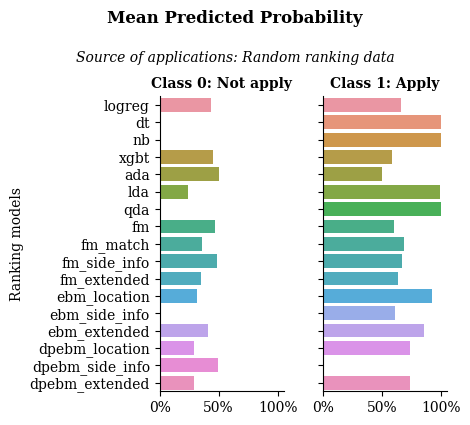

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set STIX font for plots
plt.rcParams['font.family'] = 'DejaVu Serif'

# Map Y_pred values to corresponding subplot titles
y_pred_mapping = {0: "Class 0: Not apply", 1: "Class 1: Apply"}
reg_agg["Y_pred_title"] = reg_agg["Y_pred"].map(y_pred_mapping)

g = sns.catplot(
    data=reg_agg,
    x="mean",
    y="model",
    col="Y_pred_title",  # Use the 'Y_pred_title' column for subplot titles
    kind="bar",
    height=4,
    aspect=0.6,
    orient="h",
    sharey=True
)

# Set axis labels and titles for the entire plot
g.set_axis_labels("Mean Predicted Probability by different JRS", "Ranking models")  # No \% for x-axis
g.fig.suptitle("Mean Predicted Probability", y=1.05, fontweight='bold')  # Bold main title

# Adjust individual subplot titles
g.set_titles("{col_name}", fontweight='bold')  # Bold subplot titles

# Remove the x-label from each subplot
for ax in g.axes.flat:
    ax.set(xlabel="")

# Format x-axis tick labels as percentage
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
    
# Adjust x-axis tick marks to display 0%, 50%, and 100%
for ax in g.axes.flat:
    ax.set_xticks([0, 0.5, 1])

# Add subtitle with smaller font size and in italic font
subtitle_text = "Source of applications: Random ranking data"
g.fig.text(0.5, 0.92, subtitle_text, ha='center', fontsize=10, fontweight='normal', style='italic')

# Adjust the spacing between subplots
g.tight_layout()

# Save the plot with high dpi to a local path
output_path = "./nb_analysis/random_agg_plot.png"
g.savefig(output_path, dpi=300)  # Adjust the dpi value as desired (e.g., 300 for high resolution)

# Show the plot (optional)
plt.show()
